In [12]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


In [13]:
data = pd.read_csv('orders.csv')
data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


In [14]:
data['DayTime_CartFinalize'] = pd.to_datetime(data['DateTime_CartFinalize'], format='%Y-%m-%d')


In [15]:
data = data.loc[(data['DayTime_CartFinalize'] > '2017-12-30')
                     & (data['DayTime_CartFinalize'] < '2018-12-30')]


In [16]:
data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,DayTime_CartFinalize
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0,2018-02-11 00:29:26
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0,2018-09-03 14:37:19
5,11479246,2841640,312932,2018-03-01 12:07:15.000,290000.0,مشهد,1.0,2018-03-01 12:07:15
7,11588978,5574955,715680,2018-03-04 19:19:02.000,2790000.0,رشت,1.0,2018-03-04 19:19:02
9,10740652,4928230,658519,2018-01-23 06:11:34.000,2600000.0,خرمشهر,1.0,2018-01-23 06:11:34


In [17]:
LastDay = max(data['DayTime_CartFinalize'])
LastDay

Timestamp('2018-12-11 04:47:23')

In [18]:
min(data['DayTime_CartFinalize'])

Timestamp('2017-12-30 00:07:35')

In [19]:
data.shape

(76339, 8)

In [20]:
data_describe = data.filter(['Amount_Gross_Order', 'Quantity_item'])

In [21]:
data_describe.describe()

,Amount_Gross_Order,Quantity_item
count,7.633900e+04,76339.000000
mean,1.364038e+06,1.257339
std,4.426334e+06,1.375015
min,1.000000e+00,1.000000
25%,1.400000e+05,1.000000
50%,3.300000e+05,1.000000
75%,9.653165e+05,1.000000
max,1.666239e+08,200.000000


In [22]:
data_describe.corr()

,Amount_Gross_Order,Quantity_item
Amount_Gross_Order,1.000000,-0.037662
Quantity_item,-0.037662,1.000000


In [23]:
Recency = data.groupby('ID_Customer')['DayTime_CartFinalize'].apply( lambda x: (LastDay - x.max()).days)
Recency = Recency.reset_index()
Recency.head()

,ID_Customer,DayTime_CartFinalize
0,466132,8
1,466152,98
2,466154,2
3,466163,144
4,466165,34


In [24]:
Frequency = data.groupby('ID_Customer')['ID_Order'].count()
Frequency = Frequency.reset_index()
Frequency.head()

,ID_Customer,ID_Order
0,466132,5
1,466152,1
2,466154,1
3,466163,1
4,466165,1


In [25]:
RFM1 = pd.merge(Recency, Frequency, on='ID_Customer', how = 'inner' )
RFM1.head()

,ID_Customer,DayTime_CartFinalize,ID_Order
0,466132,8,5
1,466152,98,1
2,466154,2,1
3,466163,144,1
4,466165,34,1


In [26]:
Monetary = data.groupby('ID_Customer')['Amount_Gross_Order'].sum()
Monetary = Monetary.reset_index()
Monetary.head()

,ID_Customer,Amount_Gross_Order
0,466132,1369810.0
1,466152,530000.0
2,466154,28990826.0
3,466163,1871560.0
4,466165,12900000.0


In [27]:
RFM = pd.merge(RFM1, Monetary, on='ID_Customer', how = 'inner' )
RFM.head()

,ID_Customer,DayTime_CartFinalize,ID_Order,Amount_Gross_Order
0,466132,8,5,1369810.0
1,466152,98,1,530000.0
2,466154,2,1,28990826.0
3,466163,144,1,1871560.0
4,466165,34,1,12900000.0


In [28]:
RFM.columns = ['ID_Customer','Recency', 'Frequency', 'Monetary']
RFM.head()

,ID_Customer,Recency,Frequency,Monetary
0,466132,8,5,1369810.0
1,466152,98,1,530000.0
2,466154,2,1,28990826.0
3,466163,144,1,1871560.0
4,466165,34,1,12900000.0


In [29]:
rfm_df = RFM[['Recency', 'Frequency', 'Monetary']]

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (1,10))
rfm_N = scaler.fit_transform(rfm_df)

In [32]:
rfm_N

array([[1.20809249, 1.67924528, 1.05486117],
       [3.54913295, 1.        , 1.02122658],
       [1.05202312, 1.        , 2.16108927],
       ...,
       [6.02023121, 1.        , 1.01922407],
       [5.76011561, 1.        , 1.00600749],
       [6.02023121, 1.        , 1.01401754]])

In [33]:
rfm_df_scaled = pd.DataFrame(rfm_N)
rfm_df_scaled.columns = ['Recency', 'Frequency', 'Monetary']
rfm_df_scaled.head()

,Recency,Frequency,Monetary
0,1.208092,1.679245,1.054861
1,3.549133,1.000000,1.021227
2,1.052023,1.000000,2.161089
3,4.745665,1.000000,1.074956
4,1.884393,1.000000,1.516648


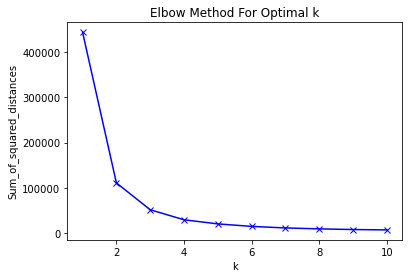

In [34]:
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(rfm_df_scaled)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [35]:
km = KMeans(n_clusters= 6 ,init='k-means++', max_iter=300 )
km = km.fit(rfm_df_scaled)
km

KMeans(n_clusters=6)

In [36]:
km.labels_

array([2, 4, 2, ..., 3, 3, 3])

In [37]:
RFM['Cluster_Id'] = km.labels_
RFM.head()

,ID_Customer,Recency,Frequency,Monetary,Cluster_Id
0,466132,8,5,1369810.0,2
1,466152,98,1,530000.0,4
2,466154,2,1,28990826.0,2
3,466163,144,1,1871560.0,0
4,466165,34,1,12900000.0,2


<AxesSubplot:xlabel='Cluster_Id', ylabel='Recency'>

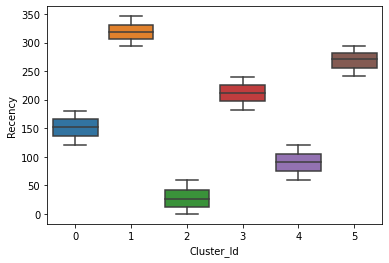

In [38]:
sns.boxplot(x='Cluster_Id', y='Recency', data=RFM)


<AxesSubplot:xlabel='Cluster_Id', ylabel='Frequency'>

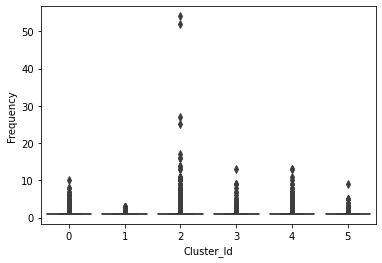

In [39]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=RFM)


<AxesSubplot:xlabel='Cluster_Id', ylabel='Monetary'>

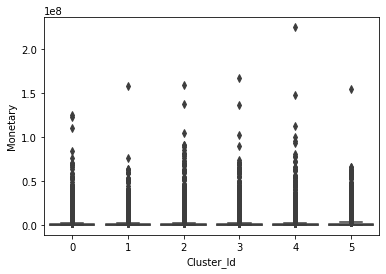

In [40]:
sns.boxplot(x='Cluster_Id', y='Monetary', data=RFM)


In [48]:
RFM.shape

(65094, 5)

In [49]:
RFM[RFM['Cluster_Id'] == 0].shape

(10557, 5)

In [50]:
RFM[RFM['Cluster_Id'] == 1].shape

(9348, 5)

In [51]:
RFM[RFM['Cluster_Id'] == 2].shape

(10941, 5)

In [52]:
RFM[RFM['Cluster_Id'] == 3].shape

(12148, 5)

In [53]:
RFM[RFM['Cluster_Id'] == 4].shape

(10914, 5)

In [54]:
RFM[RFM['Cluster_Id'] == 5].shape

(11186, 5)

In [55]:
RFM.describe()

,ID_Customer,Recency,Frequency,Monetary,Cluster_Id
count,6.509400e+04,65094.000000,65094.000000,6.509400e+04,65094.000000
mean,3.716883e+06,175.813040,1.172750,1.599676e+06,2.569515
std,2.167443e+06,99.879134,0.657036,5.059516e+06,1.694670
min,4.661320e+05,0.000000,1.000000,1.000000e+00,0.000000
25%,1.345509e+06,90.000000,1.000000,1.651380e+05,1.000000
50%,3.716580e+06,182.000000,1.000000,4.000000e+05,3.000000
75%,5.771013e+06,267.000000,1.000000,1.190000e+06,4.000000
max,7.282118e+06,346.000000,54.000000,2.247178e+08,5.000000


In [56]:
RFM.corr()

,ID_Customer,Recency,Frequency,Monetary,Cluster_Id
ID_Customer,1.000000,0.048282,-0.058907,-0.000725,0.028646
Recency,0.048282,1.000000,-0.186651,0.003539,0.081471
Frequency,-0.058907,-0.186651,1.000000,0.153041,-0.014407
Monetary,-0.000725,0.003539,0.153041,1.000000,0.000592
Cluster_Id,0.028646,0.081471,-0.014407,0.000592,1.000000


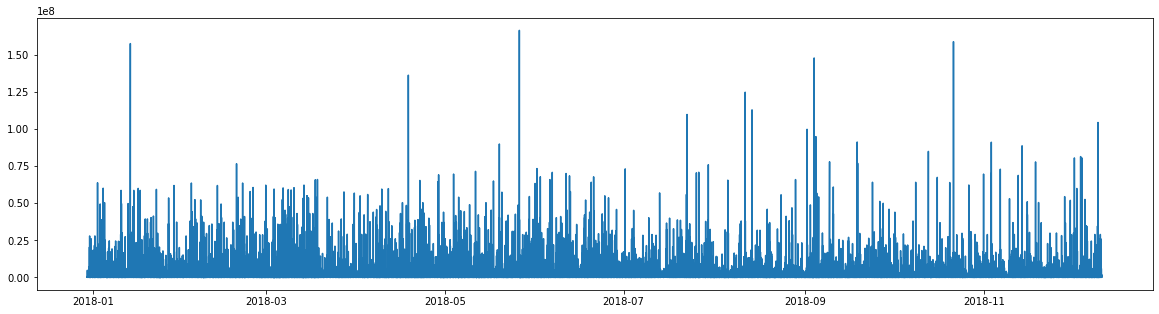

In [41]:
df_average_sales = data.groupby(by=['DayTime_CartFinalize'], as_index=False)['Amount_Gross_Order'].sum()
df_average_saless = df_average_sales.sort_values('Amount_Gross_Order', ascending=False)

plt.figure(figsize=(20,5))
plt.plot(df_average_sales.DayTime_CartFinalize, df_average_sales.Amount_Gross_Order)
plt.show()

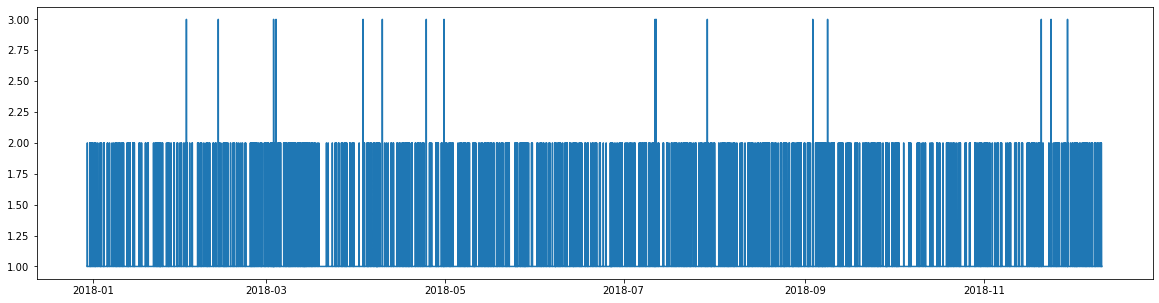

In [42]:
df_average_sales = data.groupby(by=['DayTime_CartFinalize'], as_index=False)['ID_Order'].count()
df_average_saless = df_average_sales.sort_values('ID_Order', ascending=False)

plt.figure(figsize=(20,5))
plt.plot(df_average_sales.DayTime_CartFinalize, df_average_sales.ID_Order)
plt.show()

In [43]:
orders = data.filter(['city_name_fa', 'Quantity_item'])

In [44]:
groups = orders.groupby(by=['city_name_fa'], as_index=False)
groups.first()

,city_name_fa,Quantity_item
0,آب بر,1.0
1,آبادان,1.0
2,آباده,1.0
3,آباده طشک,1.0
4,آبدان,1.0
...,...,...
774,گیوی,3.0
775,یاسوج,1.0
776,یاسوکند,1.0
777,یامچی,1.0


In [45]:
orders = groups.sum()
orders.head()

,city_name_fa,Quantity_item
0,آب بر,3.0
1,آبادان,212.0
2,آباده,34.0
3,آباده طشک,2.0
4,آبدان,1.0


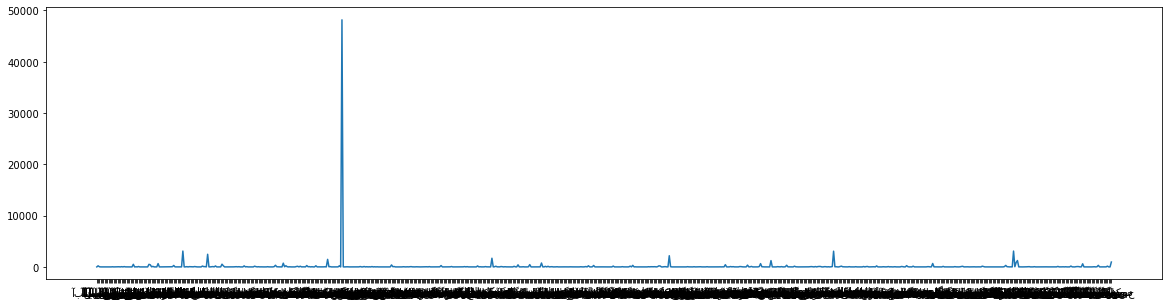

In [46]:
df_average_sales = orders.groupby(by=['city_name_fa'], as_index=False)['Quantity_item'].sum()
df_average_saless = df_average_sales.sort_values('Quantity_item', ascending=False)

plt.figure(figsize=(20,5))
plt.plot(df_average_sales.city_name_fa, df_average_sales.Quantity_item)
plt.show()

In [47]:
orders[orders['Quantity_item'] == orders['Quantity_item'].max()]


,city_name_fa,Quantity_item
188,تهران,48161.0
